In [841]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#   Análise incial dos dados

In [842]:
df = pd.read_excel('base_telecomunicacao.xlsx',sheet_name='Sheet1')
df

,Ocupacao,Idade,Cidade_Nascimento,Dispositivos,Renda_Mensal,Uso_Internet,Troca_Celular,Satisfacao_Servico,Operadora_Celular,Interesse_5G,...,Plano_5G,Motivo_Troca,Trabalho_Remoto,Possui_Plano_Telefonia,Servicos_Streaming,Prioridade_Plano,Pagar_Velocidade,Atendimento_Recebido,Plano_Familiar,Satisfacao_Geral
0,NaN,60.0,NaN,NaN,5681.0,8.0,NaN,NaN,NaN,5.0,...,NaN,Preco Alto,Nao,Sim,NaN,Velocidade,NaN,NaN,NaN,9.0
1,NaN,21.0,NaN,NaN,6172.0,8.0,NaN,NaN,NaN,2.0,...,NaN,NaN,Nao,Sim,NaN,Preco,NaN,NaN,NaN,6.0
2,NaN,21.0,NaN,NaN,NaN,2.0,NaN,9.0,NaN,8.0,...,NaN,Atendimento Ruim,NaN,NaN,NaN,Velocidade,Nao,NaN,NaN,5.0
3,NaN,34.0,NaN,NaN,3782.0,11.0,NaN,6.0,NaN,2.0,...,NaN,Atendimento Ruim,Nao,Sim,NaN,Cobertura,NaN,7.0,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,1.0,...,NaN,NaN,Nao,Sim,NaN,Cobertura,Sim,6.0,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4923,Desempregado,NaN,Rio de Janeiro,4,NaN,NaN,1-2 anos,NaN,Vivo,NaN,...,Sim,NaN,NaN,NaN,1,NaN,NaN,NaN,Sim,NaN
4924,Engenheiro,NaN,Curitiba,2,NaN,NaN,?,NaN,TIM,NaN,...,Sim,NaN,NaN,NaN,1,NaN,NaN,NaN,Sim,NaN
4925,Comerciante,NaN,São Paulo,3,NaN,NaN,1-2 anos,NaN,Vivo,NaN,...,Não,NaN,NaN,NaN,2,NaN,NaN,NaN,Não,NaN
4926,Comerciante,NaN,Goiânia,1,NaN,NaN,2-3 anos,NaN,Claro,NaN,...,Sim,NaN,NaN,NaN,3+,NaN,NaN,NaN,Sim,NaN


In [843]:
df.describe()

,Idade,Renda_Mensal,Uso_Internet,Satisfacao_Servico,Interesse_5G,Pessoas_Residencia,Gasto_Internet,Interesse_Combo,Atendimento_Recebido,Satisfacao_Geral
count,1905.000000,1939.000000,1924.000000,1907.000000,1883.000000,1965.000000,1914.000000,1899.000000,1924.000000,1904.000000
mean,43.622572,9626.135637,6.549376,5.668065,5.587892,4.837659,274.261233,5.499210,5.630457,5.597689
std,17.288482,9663.569508,3.377937,2.805975,2.788717,2.603774,114.884545,2.746465,2.827715,2.826553
min,5.000000,-500.000000,0.000000,0.000000,0.000000,1.000000,51.000000,0.000000,0.000000,0.000000
25%,31.000000,4342.000000,4.000000,4.000000,4.000000,3.000000,187.000000,4.000000,4.000000,4.000000
50%,43.000000,7662.000000,6.000000,6.000000,6.000000,4.000000,263.000000,6.000000,6.000000,6.000000
75%,56.000000,13689.500000,9.000000,8.000000,8.000000,7.000000,365.000000,7.000000,8.000000,8.000000
max,120.000000,100000.000000,15.000000,10.000000,10.000000,10.000000,500.000000,10.000000,10.000000,10.000000


In [844]:
df.dtypes

Ocupacao                   object
Idade                     float64
Cidade_Nascimento          object
Dispositivos               object
Renda_Mensal              float64
Uso_Internet              float64
Troca_Celular              object
Satisfacao_Servico        float64
Operadora_Celular          object
Interesse_5G              float64
Assistencia_TV             object
Preferencia_Compra         object
Pessoas_Residencia        float64
Gasto_Internet            float64
Plano_Preferencia          object
Conhecimento_IoT           object
Interesse_Combo           float64
Regiao                     object
Uso_Internet_5h            object
Genero                     object
Plano_Atual                object
Dispositivo_Utilizado      object
Plano_5G                   object
Motivo_Troca               object
Trabalho_Remoto            object
Possui_Plano_Telefonia     object
Servicos_Streaming         object
Prioridade_Plano           object
Pagar_Velocidade           object
Atendimento_Re

# Limpeza de dados

In [845]:

df.loc[df['Ocupacao'] == 'XYZ123', 'Ocupacao'] = np.nan
print(df['Ocupacao'].value_counts(dropna=False))

Ocupacao
NaN             2587
Estudante        484
Outro            455
Engenheiro       368
Autônomo         235
Comerciante      229
Médico           214
Professor        125
Desempregado     121
Advogado         110
Name: count, dtype: int64


In [846]:

df['Cidade_Nascimento'] = df['Cidade_Nascimento'].replace('sp', 'São Paulo')

df['Cidade_Nascimento'] = df['Cidade_Nascimento'].replace('São paulo', 'São Paulo')
df['Cidade_Nascimento'].value_counts()

Cidade_Nascimento
São Paulo         157
Aracaju           130
Curitiba          130
Teresina          123
Belo Horizonte    122
Florianópolis     121
Maceió            121
Goiânia           119
Campinas          116
Rio de Janeiro    115
Vitória           113
João Pessoa       113
Fortaleza         111
Natal             109
Brasília          108
Salvador          103
Belém             103
Manaus            101
Recife             95
Porto Alegre       91
Outra              88
Name: count, dtype: int64

In [847]:
df['Dispositivos'].value_counts(dropna=False)

Dispositivos
NaN    2478
2       958
3       736
1       362
4       224
5+      111
na       26
-1       19
Mu       14
Name: count, dtype: int64

In [848]:

df.loc[df['Dispositivos'] == 'Mu', 'Dispositivos'] = np.nan
df.loc[df['Dispositivos'] == 'na', 'Dispositivos'] = np.nan
df.loc[df['Dispositivos'] == '-1', 'Dispositivos'] = np.nan

print(df['Dispositivos'].value_counts(dropna=False))


Dispositivos
NaN    2537
2       958
3       736
1       362
4       224
5+      111
Name: count, dtype: int64


In [849]:
df.loc[df['Operadora_Celular'] == '123', 'Operadora_Celular'] = np.nan
df.loc[df['Operadora_Celular'] == 'indef', 'Operadora_Celular'] = np.nan
print(df['Operadora_Celular'].value_counts(dropna=False))

Operadora_Celular
NaN      2587
Claro     727
Vivo      586
TIM       429
Oi        341
Outra     258
Name: count, dtype: int64


In [850]:
df['Preferencia_Compra'] = df['Preferencia_Compra'].replace('ambos', 'Indiferente')
df['Preferencia_Compra'] = df['Preferencia_Compra'].replace('não sei', 'Indiferente')
df['Preferencia_Compra'].value_counts()

Preferencia_Compra
Online           1398
Lojas Físicas     743
Indiferente       297
Name: count, dtype: int64

In [851]:
df.loc[df['Plano_Preferencia'] == '?', 'Plano_Preferencia'] = np.nan
df['Plano_Preferencia'].value_counts()

Plano_Preferencia
Pós-pago    1454
Pré-pago     937
Name: count, dtype: int64

In [852]:
df.loc[df['Uso_Internet_5h'] == '?', 'Uso_Internet_5h'] = np.nan
df['Uso_Internet_5h'].value_counts()

Uso_Internet_5h
Sim    1664
Não     677
Name: count, dtype: int64

In [853]:
df.loc[df['Servicos_Streaming'] == 'Não sei', 'Servicos_Streaming'] = np.nan
df.loc[df['Servicos_Streaming'] == '-', 'Servicos_Streaming'] = np.nan
df['Servicos_Streaming'].value_counts()

Servicos_Streaming
1         926
2         604
Nenhum    465
3+        235
Name: count, dtype: int64

In [854]:
df.loc[df['Plano_Familiar'] == '?', 'Plano_Familiar'] = np.nan
df['Plano_Familiar'].value_counts()

Plano_Familiar
Sim    1190
Não    1151
Name: count, dtype: int64

In [855]:

df.loc[df['Troca_Celular'] == '?', 'Troca_Celular'] = np.nan

In [856]:
df['Conhecimento_IoT'].value_counts()

Conhecimento_IoT
5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [857]:

limite_caracteres = 1000

df['Conhecimento_IoT'] = df['Conhecimento_IoT'].apply(
    lambda x: np.nan if isinstance(x, str) and len(x) > limite_caracteres else x
)


print(df['Conhecimento_IoT'].value_counts(dropna=False))


Conhecimento_IoT
NaN     3015
5.0      283
6.0      251
7.0      247
4.0      237
0.0      156
1.0      155
2.0      144
3.0      141
8.0      104
9.0      103
10.0      92
Name: count, dtype: int64


## Fazendo maluquice

In [858]:
df_da_maluquice = df[['Ocupacao', 'Idade', 'Renda_Mensal', 'Gasto_Internet', 'Regiao', 'Genero', 'Plano_Atual', 'Motivo_Troca', 'Uso_Internet', 'Uso_Internet_5h', 'Plano_5G', 'Interesse_5G']]
df_da_maluquice.head()


,Ocupacao,Idade,Renda_Mensal,Gasto_Internet,Regiao,Genero,Plano_Atual,Motivo_Troca,Uso_Internet,Uso_Internet_5h,Plano_5G,Interesse_5G
0,NaN,60.0,5681.0,368.0,Sudeste,Feminino,Basico,Preco Alto,8.0,NaN,NaN,5.0
1,NaN,21.0,6172.0,NaN,NaN,Masculino,Basico,NaN,8.0,NaN,NaN,2.0
2,NaN,21.0,NaN,NaN,NaN,Feminino,NaN,Atendimento Ruim,2.0,NaN,NaN,8.0
3,NaN,34.0,3782.0,394.0,NaN,NaN,Basico,Atendimento Ruim,11.0,NaN,NaN,2.0
4,NaN,NaN,NaN,339.0,Nordeste,Masculino,Basico,NaN,6.0,NaN,NaN,1.0


In [859]:
# Tratando as novas variáveis
df_da_maluquice['Uso_Internet_5h'] = df_da_maluquice['Uso_Internet_5h'].replace('?', np.nan)
df_da_maluquice['Uso_Internet_5h'].unique()

df_da_maluquice['Plano_5G'] = df_da_maluquice['Plano_5G'].replace('?', np.nan)
df_da_maluquice['Plano_5G'].unique()


/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_24384/1391982360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_da_maluquice['Uso_Internet_5h'] = df_da_maluquice['Uso_Internet_5h'].replace('?', np.nan)
/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_24384/1391982360.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_da_maluquice['Plano_5G'] = df_da_maluquice['Plano_5G'].replace('?', np.nan)


array([nan, 'Sim', 'Não', 'não'], dtype=object)

Correlação entre Uso_Internet_5h e Ocupacao:
                     Uso_Internet_5h_cod  Ocupacao_cod
Uso_Internet_5h_cod             1.000000      0.442404
Ocupacao_cod                    0.442404      1.000000


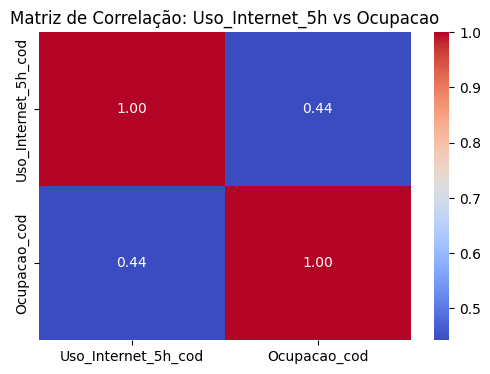

In [860]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Criando uma cópia do DataFrame para não alterar o original
df_corr = df_da_maluquice.copy()

# Codificando colunas categóricas em valores numéricos
le_uso_internet = LabelEncoder()
le_ocupacao = LabelEncoder()

# Substituindo valores nas colunas por códigos
df_corr['Uso_Internet_5h_cod'] = le_uso_internet.fit_transform(df_corr['Uso_Internet_5h'].fillna('Desconhecido'))
df_corr['Ocupacao_cod'] = le_ocupacao.fit_transform(df_corr['Ocupacao'].fillna('Desconhecido'))

# Calculando a correlação
correlacao = df_corr[['Uso_Internet_5h_cod', 'Ocupacao_cod']].corr()
print("Correlação entre Uso_Internet_5h e Ocupacao:")
print(correlacao)

# Visualizando a matriz de correlação
plt.figure(figsize=(6, 4))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Matriz de Correlação: Uso_Internet_5h vs Ocupacao')
plt.show()


In [861]:
# Preenchendo a coluna Uso_Internet_5h com base na coluna Uso_Internet
def completar_uso_internet_5h(row):
    if not pd.isna(row['Uso_Internet']):  # Verifica se a célula em 'Uso_Internet' não é nula
        return 'Sim' if row['Uso_Internet'] > 5 else 'Não'
    return row['Uso_Internet_5h']  # Mantém o valor atual caso 'Uso_Internet' seja nulo

# Aplicando a função linha a linha
df_da_maluquice['Uso_Internet_5h'] = df_da_maluquice.apply(completar_uso_internet_5h, axis=1)

# Visualizando os resultados
df_da_maluquice[['Uso_Internet', 'Uso_Internet_5h']].head(10)


/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_24384/220090822.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_da_maluquice['Uso_Internet_5h'] = df_da_maluquice.apply(completar_uso_internet_5h, axis=1)


,Uso_Internet,Uso_Internet_5h
0,8.0,Sim
1,8.0,Sim
2,2.0,Não
3,11.0,Sim
4,6.0,Sim
5,9.0,Sim
6,5.0,Não
7,NaN,NaN
8,NaN,NaN
9,4.0,Não


In [862]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Criando uma cópia do DataFrame para não modificar o original
df = df_da_maluquice.copy()

# Filtrando os dados para treino (onde Ocupacao e Uso_Internet_5h não são nulos)
dados_treino = df.loc[df.index >= 2466].dropna(subset=['Ocupacao', 'Uso_Internet_5h'])

# Codificando os dados categóricos em números
le_ocupacao = LabelEncoder()
dados_treino['Ocupacao_cod'] = le_ocupacao.fit_transform(dados_treino['Ocupacao'])
dados_treino['Uso_Internet_5h_cod'] = dados_treino['Uso_Internet_5h'].map({'Sim': 1, 'Não': 0})

# Dados de entrada (X) e saída (y) para o modelo
X = dados_treino[['Uso_Internet_5h_cod']]
y = dados_treino['Ocupacao_cod']

# Dividindo os dados para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Avaliando o modelo (opcional)
accuracy = modelo.score(X_test, y_test)
print(f"Precisão do modelo: {accuracy:.2%}")

# Preenchendo valores ausentes de Ocupacao usando o modelo
df['Uso_Internet_5h_cod'] = df['Uso_Internet_5h'].map({'Sim': 1, 'Não': 0, None: None})
dados_a_prever = df.loc[(df.index <= 2465) & (df['Uso_Internet_5h_cod'].notna())]

# Fazendo previsões
predicoes = modelo.predict(dados_a_prever[['Uso_Internet_5h_cod']])

# Decodificando as previsões de volta aos valores originais de Ocupacao
dados_a_prever['Ocupacao_pred'] = le_ocupacao.inverse_transform(predicoes)

# Preenchendo os valores no DataFrame original
df.loc[dados_a_prever.index, 'Ocupacao'] = dados_a_prever['Ocupacao_pred']

# Exibindo o resultado
df[['Ocupacao', 'Uso_Internet_5h']].value_counts


Precisão do modelo: 18.20%


/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_24384/2648510596.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_a_prever['Ocupacao_pred'] = le_ocupacao.inverse_transform(predicoes)


<bound method DataFrame.value_counts of           Ocupacao Uso_Internet_5h
0            Outro             Sim
1            Outro             Sim
2        Estudante             Não
3            Outro             Sim
4            Outro             Sim
...            ...             ...
4923  Desempregado             Não
4924    Engenheiro             Não
4925   Comerciante             Sim
4926   Comerciante             Sim
4927     Estudante             Não

[4928 rows x 2 columns]>

# Colunas escolhidas pelo grupo para a clusterização

In [863]:
df_escolhidos = df[['Idade', 'Renda_Mensal', 'Gasto_Internet', 'Regiao', 'Genero', 'Plano_Atual', 'Motivo_Troca']]
df_escolhidos.head()


,Idade,Renda_Mensal,Gasto_Internet,Regiao,Genero,Plano_Atual,Motivo_Troca
0,60.0,5681.0,368.0,Sudeste,Feminino,Basico,Preco Alto
1,21.0,6172.0,NaN,NaN,Masculino,Basico,NaN
2,21.0,NaN,NaN,NaN,Feminino,NaN,Atendimento Ruim
3,34.0,3782.0,394.0,NaN,NaN,Basico,Atendimento Ruim
4,NaN,NaN,339.0,Nordeste,Masculino,Basico,NaN


In [864]:
df_escolhidos.describe()

,Idade,Renda_Mensal,Gasto_Internet
count,1905.000000,1939.000000,1914.000000
mean,43.622572,9626.135637,274.261233
std,17.288482,9663.569508,114.884545
min,5.000000,-500.000000,51.000000
25%,31.000000,4342.000000,187.000000
50%,43.000000,7662.000000,263.000000
75%,56.000000,13689.500000,365.000000
max,120.000000,100000.000000,500.000000


In [865]:
'''
Como as colunas do nosso df_escolhidos contêm valores apenas até a linha 2465, decidimos excluir as linhas a partir dessa posição da nossa análise.
'''
df_escolhidos=df_escolhidos[:2464]

# Lidando com Outliers

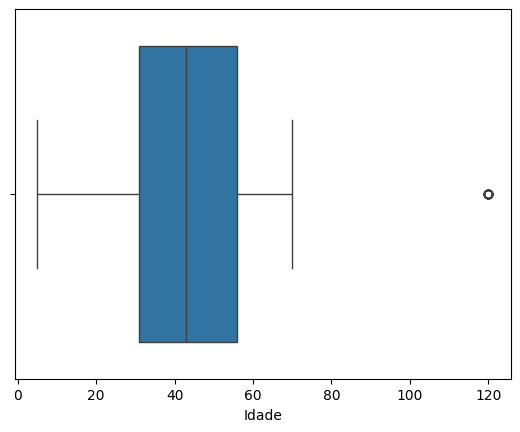

In [866]:

sns.boxplot(x=df_escolhidos['Idade'])
plt.show()

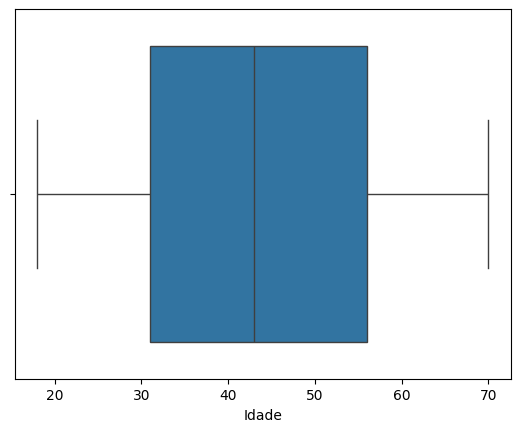

In [867]:
#Substituindo os outliers pelo segundo valor mais alto e pelo segundo valor mais baixo.
df_escolhidos['Idade'] = df_escolhidos['Idade'].replace(120,70)
df_escolhidos['Idade'] = df_escolhidos['Idade'].replace(5,18)

sns.boxplot(x=df_escolhidos['Idade'])
plt.show()

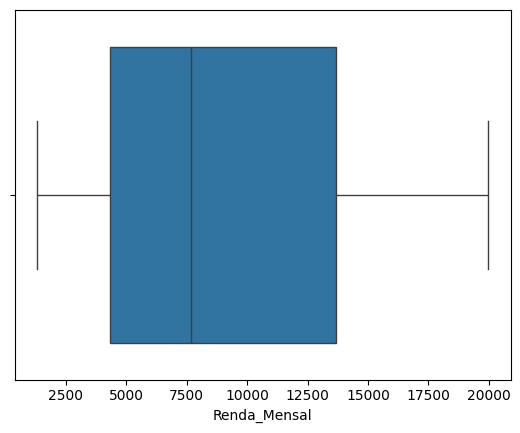

In [868]:
#Substituindo os outliers pelo segundo valor mais alto e pelo segundo valor mais baixo
df_escolhidos['Renda_Mensal'] = df_escolhidos['Renda_Mensal'].replace(100000, 19980)
df_escolhidos['Renda_Mensal'] = df_escolhidos['Renda_Mensal'].replace(-500, 1324)

sns.boxplot(x=df_escolhidos['Renda_Mensal'])
plt.show()

# Montando nosso modelo predititvo

In [869]:
#Calculando a correlação das variáveis escolhidas
def calculate_correlation(df):
    df_encoded = df.copy()
    
    label_encoder = LabelEncoder()
    for column in df_encoded.select_dtypes(include=['object', 'category']):
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column].astype(str))
    
    correlation_matrix = df_encoded.corr()
    
    return correlation_matrix



In [870]:
corr=calculate_correlation(df_escolhidos)

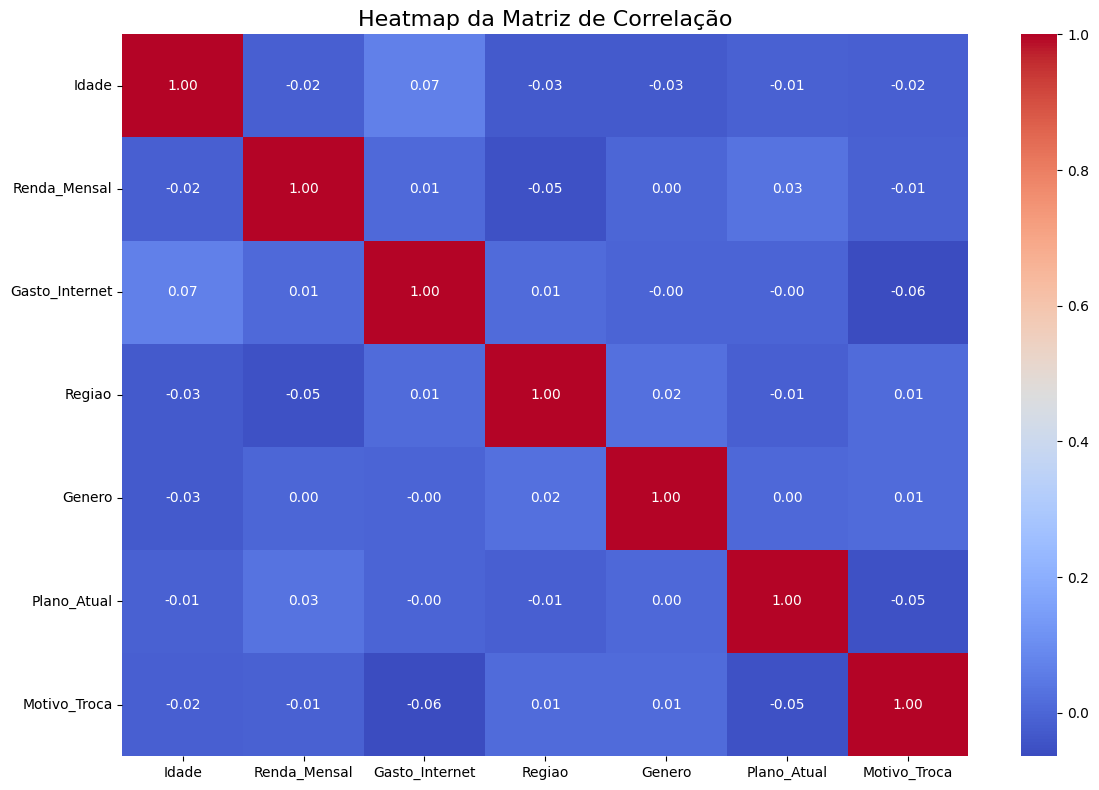

In [871]:
#Criando o heatmap para analisar a correlação das minhas variáveis
plt.figure(figsize=(12, 8))

sns.heatmap(
    corr,
    annot=True,  
    fmt=".2f",      
    cmap="coolwarm", 
    cbar=True      
)

plt.title("Heatmap da Matriz de Correlação", fontsize=16)
plt.tight_layout()

plt.show()

Analisando o mapa de correlação, percebemos que a maioria das variáveis apresenta correlação baixa, com exceção das qualitativas, que têm uma correlação consideravel. Como estamos lidando com 8 colunas com valores ausentes, optamos por usar o IterativeImputer com RandomForestRegressor. O IterativeImputer é eficiente em cenários com muitas colunas ausentes, enquanto o Random Forest lida bem com relações não lineares e baixa correlação, tornando essa combinação ideal para nossos dados.

In [872]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [873]:


def impute_mixed_data(df):
    df_imp = df.copy()
    
    numeric_cols = df_imp.select_dtypes(include=[np.number]).columns
    categorical_cols = df_imp.select_dtypes(exclude=[np.number]).columns
    
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        non_null_data = df_imp[col].dropna()
        le.fit(non_null_data)
        df_imp[col] = pd.Series(le.transform(non_null_data), index=non_null_data.index)
        label_encoders[col] = le
    
    imputer = IterativeImputer(
        estimator=RandomForestRegressor(n_estimators=200),
        max_iter=20,
        random_state=42
    )
    
    imputed_data = imputer.fit_transform(df_imp)
    
    df_imputed = pd.DataFrame(imputed_data, columns=df_imp.columns, index=df_imp.index)
    
    for col in categorical_cols:
        df_imputed[col] = label_encoders[col].inverse_transform(df_imputed[col].round().astype(int))
    
    return df_imputed



# Treinando nosso modelo

In [874]:
df_test=df_escolhidos.dropna()

In [875]:
df_test

,Idade,Renda_Mensal,Gasto_Internet,Regiao,Genero,Plano_Atual,Motivo_Troca
0,60.0,5681.0,368.0,Sudeste,Feminino,Basico,Preco Alto
12,31.0,10690.0,459.0,Sudeste,Feminino,Intermediario,Cobertura Ruim
15,59.0,3383.0,316.0,Sudeste,Masculino,Intermediario,Cobertura Ruim
20,60.0,7178.0,385.0,Sudeste,Feminino,Basico,Preco Alto
21,32.0,7274.0,363.0,Sudeste,Masculino,Basico,Atendimento Ruim
...,...,...,...,...,...,...,...
2433,23.0,17665.0,149.0,Centro-Oeste,Masculino,Intermediario,Preco Alto
2441,32.0,7592.0,143.0,Sudeste,Feminino,Basico,Preco Alto
2444,30.0,2887.0,325.0,Norte,Feminino,Premium,Cobertura Ruim
2447,36.0,7716.0,255.0,Sudeste,Masculino,Basico,Preco Alto


In [876]:
'''Função para inserir valores nulos em 20% de cada coluna em um DataFrame. 
Usamos a taxa de 20% porque é a taxa média de valores nulos no nosso DataFrame que queremos aplicar esse modelo
'''
def introduce_nan(df, fraction=0.2, random_state=50):
    np.random.seed(random_state)
    df_with_nan = df.copy()

    for col in df.columns:
        total_values_in_col = df.shape[0]
        nan_count_in_col = int(total_values_in_col * fraction)
        nan_indices = np.random.choice(df.index, nan_count_in_col, replace=False)
        df_with_nan.loc[nan_indices, col] = np.nan

    return df_with_nan

In [877]:
'''
Aqui estamos testando nosso modelo e calculando a acurácia.
 No entanto, como estamos lidando com variáveis quantitativas, como Renda Mensal e Gasto com Internet,
  mesmo um modelo eficiente dificilmente será capaz de prever os valores exatos.
   Por isso, avaliamos que a acurácia não é uma métrica adequada para julgar o desempenho do nosso modelo, 
   já que ela não reflete de forma justa a qualidade das previsões em variáveis contínuas.
'''
df_with_nan = introduce_nan(df_test, fraction=0.2)
df_imputed = impute_mixed_data(df_with_nan)

mask_nan = df_with_nan.isna()
total_nan = mask_nan.sum().sum()

correct_imputations = (df_test[mask_nan] == df_imputed[mask_nan]).sum().sum()
accuracy = correct_imputations / total_nan * 100

accuracy

/Users/jgfaraco/Insper Junior/Clustering/Telecconect_analysis/env/lib/python3.13/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


np.float64(21.858864027538726)

# Avaliando nosso modelo

Para obter uma visão geral do desempenho do nosso modelo, comparamos as médias, os quartis e o desvio padrão entre a base real e a nossa estimativa. Essa abordagem permite avaliar se as distribuições dos dados estimados estão alinhadas com os dados reais.

In [878]:
df_test.describe()

,Idade,Renda_Mensal,Gasto_Internet
count,417.000000,417.000000,417.000000
mean,43.419664,9001.467626,281.589928
std,14.937977,5601.702548,114.095217
min,18.000000,1324.000000,51.000000
25%,32.000000,4329.000000,194.000000
50%,42.000000,7575.000000,275.000000
75%,55.000000,13486.000000,376.000000
max,70.000000,19980.000000,498.000000


In [879]:
df_imputed.describe()

,Idade,Renda_Mensal,Gasto_Internet
count,417.000000,417.000000,417.000000
mean,43.344532,9073.768201,285.528417
std,13.684440,5192.494622,103.507473
min,18.000000,1324.000000,51.000000
25%,34.000000,5092.500000,212.000000
50%,42.000000,8039.000000,287.000000
75%,54.000000,12424.000000,361.000000
max,70.000000,19980.000000,498.000000



Para realizar uma análise mais completa do desempenho do nosso modelo, optamos por criar um boxplot comparando as variáveis quantitativas da base real com as da base prevista pelo modelo.

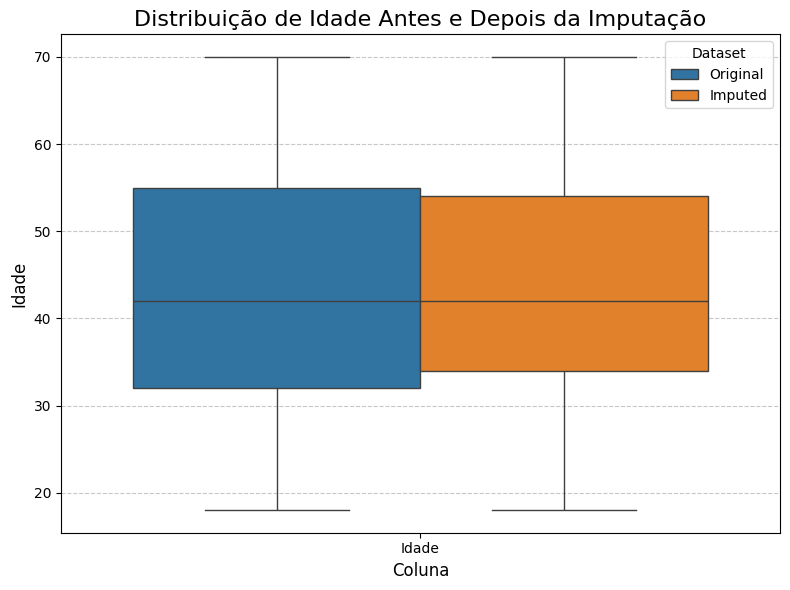

In [880]:

column_of_interest = ['Idade']

df_test_melted = df_test[column_of_interest].melt(var_name='Coluna', value_name='Valor')
df_test_melted['Dataset'] = 'Original'

df_imputed_melted = df_imputed[column_of_interest].melt(var_name='Coluna', value_name='Valor')
df_imputed_melted['Dataset'] = 'Imputed'

df_combined = pd.concat([df_test_melted, df_imputed_melted])

plt.figure(figsize=(8, 6))
sns.boxplot(x='Coluna', y='Valor', hue='Dataset', data=df_combined)
plt.title('Distribuição de Idade Antes e Depois da Imputação', fontsize=16)
plt.xlabel('Coluna', fontsize=12)
plt.ylabel('Idade', fontsize=12)
plt.legend(title='Dataset', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



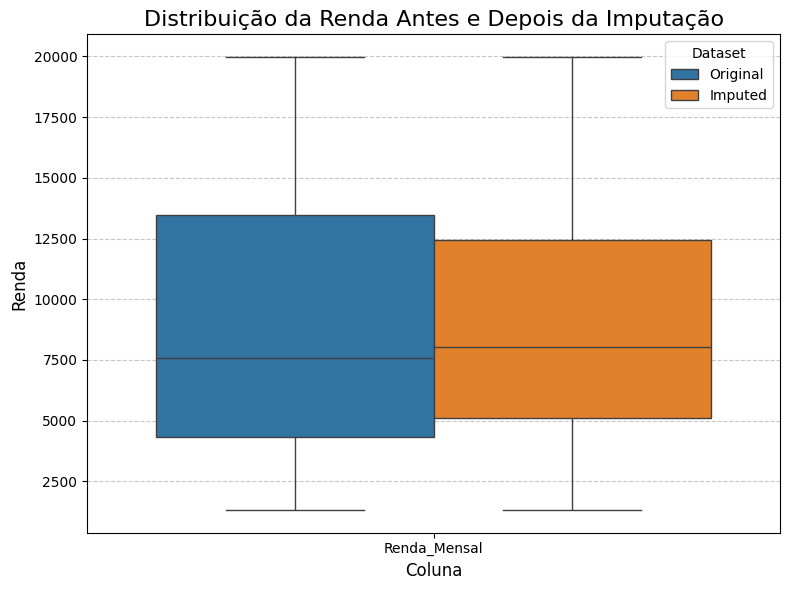

In [881]:

column_of_interest = ['Renda_Mensal']

df_test_melted = df_test[column_of_interest].melt(var_name='Coluna', value_name='Valor')
df_test_melted['Dataset'] = 'Original'

df_imputed_melted = df_imputed[column_of_interest].melt(var_name='Coluna', value_name='Valor')
df_imputed_melted['Dataset'] = 'Imputed'

df_combined = pd.concat([df_test_melted, df_imputed_melted])

plt.figure(figsize=(8, 6))
sns.boxplot(x='Coluna', y='Valor', hue='Dataset', data=df_combined)
plt.title('Distribuição da Renda Antes e Depois da Imputação', fontsize=16)
plt.xlabel('Coluna', fontsize=12)
plt.ylabel('Renda', fontsize=12)
plt.legend(title='Dataset', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

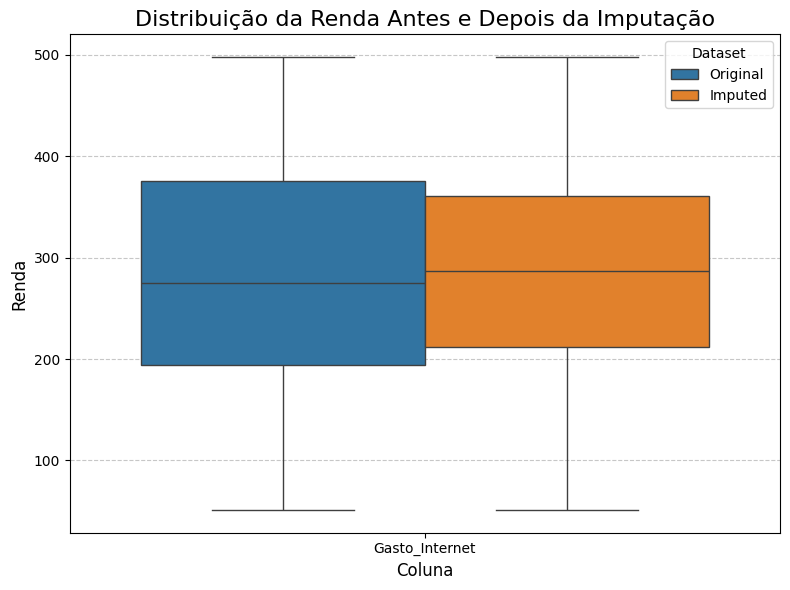

In [882]:

column_of_interest = ['Gasto_Internet']
df_test_melted = df_test[column_of_interest].melt(var_name='Coluna', value_name='Valor')
df_test_melted['Dataset'] = 'Original'

df_imputed_melted = df_imputed[column_of_interest].melt(var_name='Coluna', value_name='Valor')
df_imputed_melted['Dataset'] = 'Imputed'

df_combined = pd.concat([df_test_melted, df_imputed_melted])

plt.figure(figsize=(8, 6))
sns.boxplot(x='Coluna', y='Valor', hue='Dataset', data=df_combined)
plt.title('Distribuição da Renda Antes e Depois da Imputação', fontsize=16)
plt.xlabel('Coluna', fontsize=12)
plt.ylabel('Renda', fontsize=12)
plt.legend(title='Dataset', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

O desempenho do nosso modelo foi considerado bom, pois, ao analisar o boxplot, observamos que a mediana da base preenchida pelo modelo ficou próxima da mediana da base real. Além disso, o modelo tende a reduzir o IQR (intervalo interquartílico), indicando que os valores imputados estão se aproximando da mediana ou média, o que sugere que o modelo preenche os valores faltantes de forma consistente com a distribuição dos dados reais.

Para analisar os dados qualitativos, geramos gráficos de barras para cada coluna em ambos os DataFrames e calculamos a acurácia do modelo com base nas diferenças entre os valores reais e os valores imputados.

In [883]:

def plot_comparacao(df_test, df_imputed, column_name):
    count_test = df_test[column_name].value_counts()
    count_imputed = df_imputed[column_name].value_counts()

    all_categories = count_test.index.union(count_imputed.index)

    count_test = count_test.reindex(all_categories, fill_value=0)
    count_imputed = count_imputed.reindex(all_categories, fill_value=0)

    abs_diff = abs(count_test - count_imputed)
    total_count = len(df_test) + len(df_imputed)
    margem = (abs_diff.sum() / total_count * 100)

    ax = count_test.plot(kind='bar', width=0.4, position=1, label='Dados Reais', color='blue', figsize=(10, 6))
    count_imputed.plot(kind='bar', width=0.4, position=0, label='Modelo Preditivo', color='orange', ax=ax)

    plt.title(f'Comparação entre Dados Reais e Modelo Preditivo para a coluna: {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Contagem')
    plt.xticks(rotation=0)
    plt.legend(title='Base de Dados')
    plt.show()

    print(f'A margem de erro é: {margem:.2f}%')




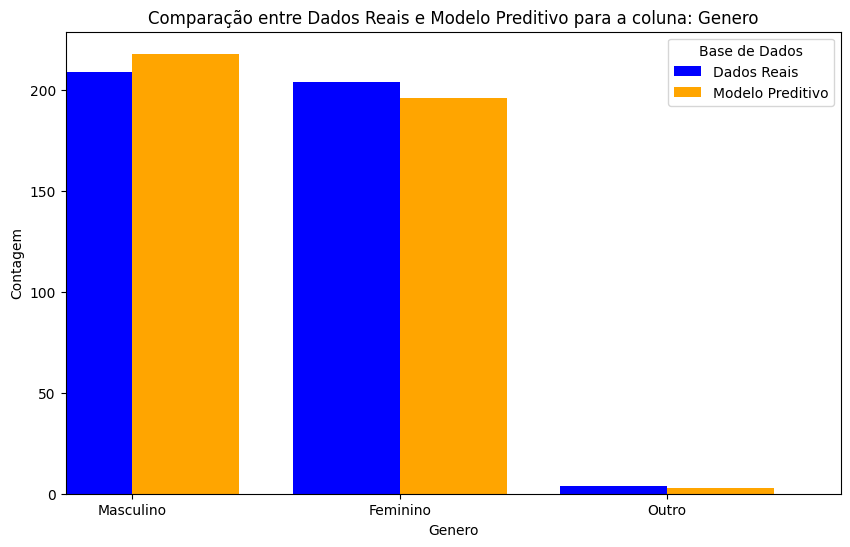

A margem de erro é: 2.16%


In [884]:
plot_comparacao(df_test, df_imputed, 'Genero')

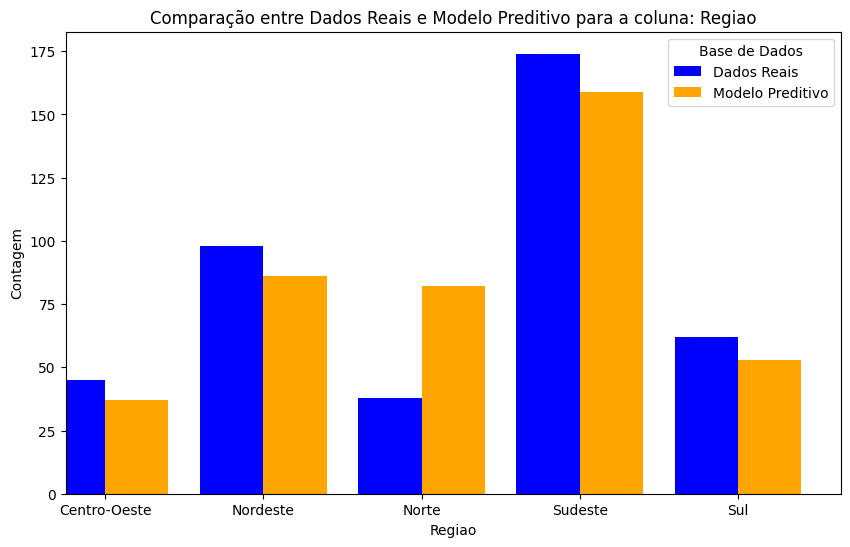

A margem de erro é: 10.55%


In [885]:
plot_comparacao(df_test, df_imputed, 'Regiao')

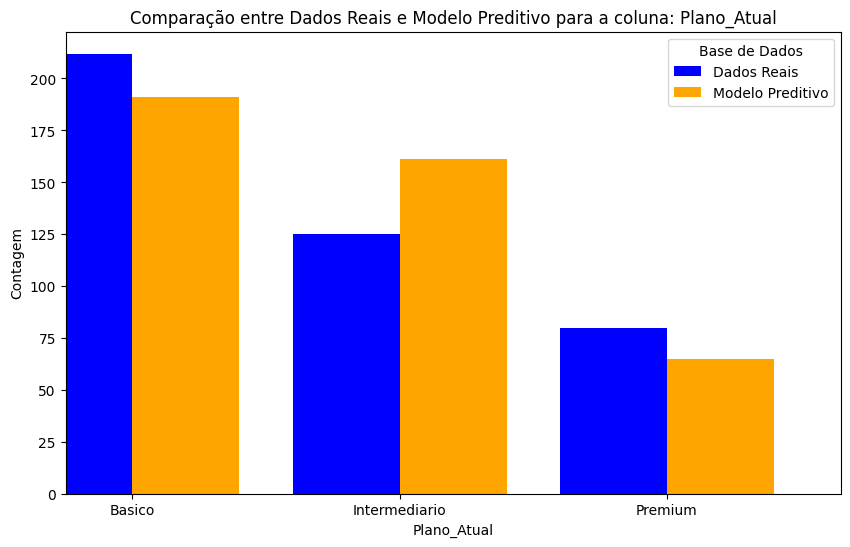

A margem de erro é: 8.63%


In [886]:
plot_comparacao(df_test, df_imputed, 'Plano_Atual')

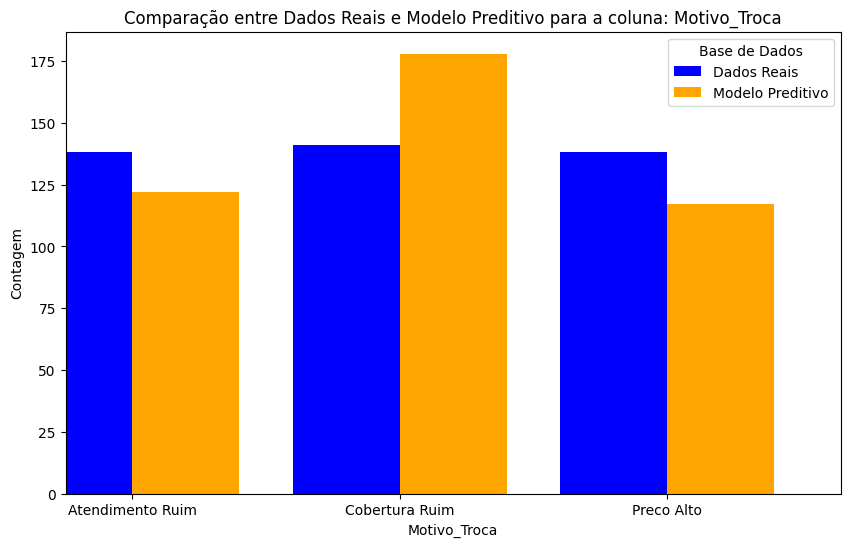

A margem de erro é: 8.87%


In [887]:
plot_comparacao(df_test, df_imputed, 'Motivo_Troca')

A analise comprova o desempenho bom do modelo, dado que a margem de erro foi de 7,5%

# Aplicando o modelo

In [888]:
df_final =impute_mixed_data(df_escolhidos)

/Users/jgfaraco/Insper Junior/Clustering/Telecconect_analysis/env/lib/python3.13/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [891]:
df_final.head(50)

,Idade,Renda_Mensal,Gasto_Internet,Regiao,Genero,Plano_Atual,Motivo_Troca
0,60.000,5681.000,368.000,Sudeste,Feminino,Basico,Preco Alto
1,21.000,6172.000,214.275,Sudeste,Masculino,Basico,Cobertura Ruim
2,21.000,7569.545,267.620,Norte,Feminino,Intermediario,Atendimento Ruim
3,34.000,3782.000,394.000,Sudeste,Masculino,Basico,Atendimento Ruim
4,49.560,8875.020,339.000,Nordeste,Masculino,Basico,Cobertura Ruim
5,47.000,4396.000,94.000,Nordeste,Feminino,Premium,Cobertura Ruim
6,48.490,5938.650,287.000,Sudeste,Masculino,Basico,Preco Alto
7,37.740,5783.000,227.000,Sudeste,Masculino,Premium,Atendimento Ruim
8,37.000,8017.560,350.000,Nordeste,Masculino,Basico,Preco Alto
9,43.000,2845.000,62.000,Sudeste,Feminino,Premium,Preco Alto


In [890]:

df_final.to_csv('base_com_modelo_sem_ocupacao.csv', index=False)
